# Assessment Tasks

**Author:** Mark Cotter
**Email:**  g00376335@gmit.ie

This is my Jupyter notebook for researching, developing and documenting assessment task set for the GMIT module Machine Learning and Statistics.

***

### Task 1: Square root of 2 Function

**Task Description:** Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.

***

### Research

##### Square root
**Definition of square root of a number:** A mathematical relationship to a given original number, insofar as when the square root number is multiplied by itself (otherwise known as the number squared), the multiplication result equals the value of the original number [1.1, 1.2].

The square root of two has a mathematical property that it cannot be written as a fraction, making it an irrational number [1.3]. This also means that the amount of decimal places for square root of 2 is infinite and has currently been calculated to 10 trillion digits [1.4, 1.5]. The square root of 2 to 100 decimal places is as follows [1.6].

$$ \sqrt{2} = 1.4142135623 7309504880 1688724209 6980785696 7187537694 8073176679 7379907324 7846210703 8850387534 3276415727... $$

##### Computer calculation
Computers can be used to calculate the approximate square root of a given number, where an initial guess for the square root is taken and a recursive algorithm is used to calculate a better estimate of the square root [1.7].

##### Newton's method
Newton's method is an algorithm that is often used to quickly calculate the square root of a number [1.8]. In computing, Newton's method does have problems insofar as a poor initial guess, oscillating successive estimations and rounding errors may cause the algorithm not to converge on the desired result or for two different computers to produce different results using the same algorithm [1.8, 1.9]. This algorithm progressively estimates a better approximately of the square root of $q$ using the average of the initial guess $x_{0}$ and fraction of $q$ divided by $x_{0}$, with the reasoning that if $x_{0}$ is too big then $\frac{q}{x_{0}}$ would be too small. The equation for the first iteration of the Newton's algorithm to calculate the next better square root estimate $x_{1}$ is as follows [1.8]:

***

$$ x_{1} = \frac{1}{2} (x_{0} + \frac{q}{x_{0}})$$

***

##### Bakhshali manuscript method
Another less well known algorithm for calculating the square root of a number is the Bakhshali manuscript method [1.7, 1.10]. It is based on an ancient Indian mathematical manuscript. This algorithm also requires the use of an initial guess for the square root $x_{0}$ of a number $q$. To calculate the next better approximation of the square root $x$, a modifier value $a$ is calculated based the difference between $q$ and the square of previous square root estimate $x$. This method has been shown to be equivalent to two iterations of the Newton method [1.7, 1.10]. The equations for the first iteration of the Bakhshali algorithm to calculate the next better square root estimate $x_{1}$ is as follows [1.10]:

***

$$a_{0} = {\frac{q - x^2_{0}}{2x_{0}}} $$


$$ x_{1} = x_{0} + a_{0} - {\frac{a^2_{0}} {2(x_{0} + a_{0})}}$$

***


##### Digit-by-digit calculation method
A different approach I investigated, is the digit-by-digit calculation method [1.7, 1.13]. This method involves treating the square root number as a sum of each digit position that make up the whole and decimal parts of the square root number. The algorithm to implement this method involves using only integer values.

The thinking behind the method is that the square root of a number $q$ is made up of a series of numbers, let's say a two digit number $xy$. The left digit of the square root is the largest digit so that $x^{2} \leq q$. The remainder $r$ can be used to calculate the next largest digit $y$ so that $(10x + y)^{2} \leq q$, where $x$ and $y$ are the two largest digits in the sequence of $\sqrt{q}$. This can be repeated for square root numbers with more digits or decimal places. 

If the numbers are divided into pairs the largest square root of a pair of number is a single digit [1.16]. As the calculation progresses to the right, the remainder $r$ is passed right and the left part $p$ of the square root remains the same. As such only the further digits to the right would have to be calculated. The part $p$ of the square root that is already calculated is scaled up by a factor of 10 after each iteration during the calculation, thereby maintaining $p$ as an integer and avoiding float point approximations. This method can be used to incrementally calculate each square root digit. When displays in a line each digit of $p$ show the value of the square root number required. The method is based on the following expansion of equation above [1.7, 1.12].

$$q = (10x + y)^{2} = 100x^{2} + 20xy + y^{2} = (10x)^{2} + (20x + y)y$$

Where x and y are two successive digits in the sequence of the square root result.

When we are looking for the next digit in the calculation $y$, we know that the part of the square root already calculated for the digit shifted to the left $10x$ is squared and subtracted from the $q$, it gives us a current value $c$ to calculate the next digit value $y$, such that

$$(20x + y)y \leq c$$

$$(20x + y)y \leq c$$

$x$ is the part of the know part $p$ of the square before it was factored up by 10, so this equation can be rewriting as

$$(20p + y)y \leq c$$

The remainder $r$ can be calculated the using the formula $(20p + y)y + r = c$ or $r = c - (20p + y)y$

Using a version Newton's method using integer division the largest next integer part of the square root can be calculated accurately without have to deal with floating point number approximations and rounding [1.13, 1.14].

### Steps and challenges to implementation the square root algorithm in Python code

##### Newton's and Bakhshali manuscript methods
* Define a Python function called "sqrt2bn" for calculating square roots.

* Pick a reasonable initial estimate for the square root the required number. The task instructions require the function to printed to the screen $\sqrt{2}$. My first chosen estimate setting $x_{0} = \frac{1}{2} q$ resulted in a having a $0$ value for the Bakhshali method $a$ modifier for testing $\sqrt{4}$. As such, I decided to set $x_{0} = \frac{2}{3} q$.

* Use a loop to iterate the equations a number of times. A while loop that ends when a reasonable precision is reached was chosen.

* Limit the number of loop iterations to a sensible number say 10 to prevent the algorithm loop oscillating or diverging from the desired result creating an infinite loop.

* Decide how to display the square root result to 100 decimal places. A formatted string seems the best solution.

* Write equations to calculate a better approximation of the square root. After applying the Bakhshali method equation [1.10] the estimate of $\sqrt{2}$ was achieved correct to 14 to 15 decimal places. However, after the third iteration, the calculations estimate of $\sqrt{2}$ started oscillating continuously between two estimates. A check using the alternative Newton's method equation [8] showed that it also reached a recurring estimate after the forth iteration and the level of precision for the approximation of $\sqrt{2}$ was also correct to 14 decimal places. The Bakhshali method appeared to achieve an accurate result for square root in slightly less iterations than the Newton's method.

* Test the function against known values/functions for square root. During testing I used user input value version of the sqrt2() function to test two known square roots for two perfect square numbers [2]. For testing I used the Python numpy and math module functions both called sqrt() to check what precision they could achieve and both appear to calculate $\sqrt{2}$ correct to 15 decimal places also.

* Devise a method for storing the square root to 100 decimal places. The estimated approximations of $\sqrt{2}$ are limited a maximum of 50 decimal places. This appears to be due to the 53 significant bit limit for a 64 bit binary number [1.11] for Python floating point numbers after which rounding/truncation occurs.

* I could not store and displaying more than 53 significant bits to achieve a 100 decimal place precision to print to the screen using either the Newton's and Bakhshali manuscript methods.


##### Digit-by-digit calculation method
* An alternative strategy to calculate the square root to a higher degree of accuracy is using the "Digit-by-digit calculation" calculation method [1.7].

* Investigate digit-by-digit calculation method [1.12, 1.13, 1.14, 1.15].


Review how to calculate each successive digit using pairs of digits and remainders using the following steps.
1. Divide the given number $q$ into array lists of pairs of digits left and right of the decimal place. The number of pairs to in the list right of the decimal of $q$ determine the number of decimal places that the algorithm will calculate.
1. Set $p$ equal the part of the square root already calculated.
1. Starting with the next pair from the left, set this value to the current value $c$. Any remainder $r$ from the previous run of the calculation should be added to the left of the digits in $c$ i.e. moved 2 position to the left by multiplying by 100 and the result added to $c$.
1. Find $y$ the next largest integer number such that $y(20p + y) \leq c$. This can be rewritten in the form of the equation $ay^{2} + by + constant \leq 0$ where $a = 1$, $b = 20p$ and $constant = -c$.
1. The positive derivative of a quadratic equation [1.15] is $y = \frac{-b + \sqrt{b^{2} - 4a(constant)}}{2a}$, which for the previous equation equate to $\frac{-20p + \sqrt{(20p)^{2} - 4(1)(-c)}}{2(1)}$.
1. Using only the rounded down integer value of the square root and the rounded down integer division by 2 in the previous equation, the next value of $y$ can be calculated as an integer, without floating point approximation errors [1.13, 1.14].
1. Calculate the remainder $r$ such that $r = c - y(20p + y)$.
1. Add $y$ as the next digit on right to calculated part $p$ of $\sqrt{q}$ i.e. $p = 10p + y$
1. Move to the next pair of digits to the right in the paired number array lists.
1. Loop back to step 3 until no more pairs remain to be calculated in the array list to the right of the decimal place.
1. The decimal point location is ignored during the calculation run as $p$ is factored up by 10 on each iteration. The decimal point is added in at the appropriate location to display the final result between digit calculated for the $\sqrt{q}$ to the left and right of the original decimal point location in $q$.

***
* Define a Python function called "integersqrt" for calculating integer square roots.

* Define a Python function called "sqrt2" for calculating square roots.

* Implement the digit-by-digit calculation method for calculating the square root of integer values

* Test the code with various input integer values and compare various methods with known values of square root of 2.

### Code Implementation

In [1]:
# Implementation of sqrt2bn function code using Bakhshali + Newton's

# Square root function using 'Bakhshali method' & 'Newton's method'
# that calculates and displays square of a number "q"
def sqrt2bn(q=2,prec=100,method=1,):
    """Computes square root of a number, default q = 2
       Number of decimal places to be displayed, default prec = 100
       Method to be used:  1 = 'Bakhshali method'
                           2 = 'Newton's method'
       """
    
    # Set initial guess for the square root x0 equal 2/3 of q
    x = (2 * q)/3

    # Loop counter for setting loop break condition
    i = 1
    # Set maximum loop limit
    limit = 10
    
    # Print Title
    if method == 1:
        print("Iteratively better estimates using 'Bakhshali method' for the square root of", q, "are:")
    else:
        print("Iteratively better estimates using 'Newton's method' for the square root of", q, "are:")
    
    # Irritate until loop is broken
    while True:
        # End loop at maximum loop count
        if i > limit:
            break
        else:
            # Use METHOD OPTION 1 - Bakhshali method
            if method == 1:
                # Calculate Bakhshali algorithm modifier, a
                a = (q - (x * x))/(2 * x)
                # Calculate next best guess for square root, using the Bakhshali method equation
                x = (x + a - ( (a*a)/( 2*(x+a) ) ))
                
            # Use METHOD OPTION 2 - Newton's method
            elif method == 2:
                # Calculate next best guess for square root, using the Newton's method equation
                x = (x + (q/x) ) / 2
                
            # Exit loop if available OPTION not selected
            else:
                print("METHOD selection error\n")
                # End loop
                break
            
            # Print result of result to set precision for step in the iteration.
            # Code adapted from https://mkaz.blog/code/python-string-format-cookbook/
            print(i,"={:.{}f}".format(x, prec))
            # Iterate counter, i
            i += 1
    # Add blank line
    print("")

# Run sqrt2bn() function
#sqrt2bn()

In [2]:
# Method to calculate the largest integer square root value of a number

# Code adapted from [1.14]
def integersqrt(n):
    """ Calculates 'isqrt' the largest integer square root of a number 'n'
        so that 'isqrt' squared is less than 'n', new_isqrt is the next guess
        using floor division and Newton's method.
        """
    # Initial state of integer sqrt
    isqrt = n
    # Initial guess for the largest integer square root
    # equals slightly more than half of n to make sure the next guess progresses in the right
    # direction when near n is near 1 and avoids halving even numbers
    new_isqrt = (n + 1) // 2
    # loop until new guess is larger previous guess
    while new_isqrt < isqrt:
        # update isqrt to equal next best integer square root
        isqrt = new_isqrt
        # progressively reduce the next guess integer new_isqrt until the next guess
        # for the integer square root is larger than the previous guess
        new_isqrt = (isqrt + n // isqrt) // 2
    # return the largest integer square root
    return isqrt

In [3]:
# Implementation of sqrt2 function code using "Limit of Digit by Digit Calculation" method
# that calculates displays sqrt of integer  q to precision of prec
# Code adapted from procedure and equations [1.12, 1.13, 1.14, 1.15]
def sqrt2(q=2, prec=100):
    """Computes square root of an integer 'q', default q = 2
       to precision 'prec', default prec = 100
       """
    # Create lists for storing the number pairs left and right of the decimal place of q
    pairsL = []
    pairsR = []
    # Create a list for storing the square root result
    sqrtlist = []
    # Create a string base on the printed value of parameter q
    s = str(q)
    
    ## Use loop to populate the pairs list with pairs of numbers and empty list s
    while len(s) > 0:
        # Take last 2 character from string Code adapted from
        # https://docs.python.org/3/tutorial/introduction.html#strings &
        # https://www.geeksforgeeks.org/python-perform-append-at-beginning-of-list/
        pairsL.insert(0, s[-2:])
        # Remove last 2 characters in s
        s = s[:-2]    
    # s is currently empty. Add pairs of zero to s based on length of parameter prec
    s += "00" * prec
    ## Use loop to populate the pairs list with pairs of 00 and empty list s
    while len(s) > 0:
        # Add pairs of "00" characters to string array
        pairsR.append(s[:2])
        # Remove first 2 "00" in from string s
        s = s[2:]
    # Test print
    #print("pairs lists are ", pairsL, ".", pairsR)
      
    # part of the sqrt of q already found
    p = 0
    # remainder from previous calculation
    r = 0

    # For the paired value left of the decimal point
    for i in range(len(pairsL)):
        # Extract next paired digit list and convert to integers and add remainder
        # from previous run which is 10pow2 time larger scale
        # current value
        c = r*100 + int(pairsL[i])
        # Calculate next integer digit of the square root
        y = (-20*p + integersqrt((20*p)**2 + 4 *c)) // 2
        # Calculate remainder r
        r = c - ( y * ( 20*p + y) )
        # Add the next digit to the known part of the square root
        p = p*10 + y
        # Add y to sqrt digit list
        sqrtlist.append(y)
    
    # Add decimal place to sqrt list
    sqrtlist.append(".")
    
    # For the paired value right of the decimal point
    for i in range(len(pairsR)):
        # Extract next paired digit list and convert to integers and add remainder
        # from previous run which is 10pow2 time larger scale
        # current value
        c = r*100 + int(pairsR[i])
        # Calculate next integer digit of the square root
        y = (-20*p + integersqrt((20*p)**2 + 4 *c)) // 2
        # Calculate remainder r
        r = c - ( y * ( 20*p + y) )
        # Add the next digit to the known part of the square root
        p = p*10 + y
        # Add y to sqrt digit list
        sqrtlist.append(y)
    
    # Print calculated list
    #print(sqrtlist)
    
    # Print list as a string
    stringList = ""
    
    # Loop to add all the array element together into a single string
    for i in range(len(sqrtlist)):
        stringList = stringList + str(sqrtlist[i])
    
    # Print calculated list
    print(f"The square root of '{q}' using Digit by Digit method to '{prec}' decimal places is as follows:")
    print(stringList,"\n")
    
# Implementation of function calculation
sqrt2()

The square root of '2' using Digit by Digit method to '100' decimal places is as follows:
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727 



### Testing of alternative options and input

In [4]:
# Code for Testing

# Test 1 - Perfect square a
sqrt2bn(4,100,2)

# Test 2 - Perfect square b
sqrt2bn(16,100,1)

# Test 3 - Square root of 2 - Bakhshali method
sqrt2bn()

# Test 4 - Square root of 2 - Newton's method
sqrt2bn(2,100,2)

# Test 5 - Square root of 564856 - Digit by Digit method
sqrt2(564856,100)

# Test 6 - Square root of 2 - Digit by Digit method
sqrt2(2,100)

Iteratively better estimates using 'Newton's method' for the square root of 4 are:
1 =2.0833333333333330372738600999582558870315551757812500000000000000000000000000000000000000000000000000
2 =2.0016666666666669271990031120367348194122314453125000000000000000000000000000000000000000000000000000
3 =2.0000006938662227007341698481468483805656433105468750000000000000000000000000000000000000000000000000
4 =2.0000000000001203481758693669689819216728210449218750000000000000000000000000000000000000000000000000
5 =2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
6 =2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
7 =2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
8 =2.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
9 =2.0000000000000000000000000000000000000000000000000000000000000000

In [5]:
# Import math module for testing
import math
# Display math square root function for sqrt of 2
print("Python Math module square root of 2 is:\n{:.{}f}".format(math.sqrt(2), 100))

Python Math module square root of 2 is:
1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [6]:
# Import numpy module for testing
import numpy as np
# Display numpy square root function for sqrt of 2
print("Python Numpy module square root of 2 is:\n{:.{}f}".format(np.sqrt(2), 100))

Python Numpy module square root of 2 is:
1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


### Conclusions
Using Python, both the Bakhshali method and Newton's method can be used to calculate the $\sqrt{2}$ using floating point number correct to approximately 14 decimal places. Similarly Python numpy and math module functions both called sqrt() can only calculate $\sqrt{2}$ to 15 decimal places. A larger binary bit would be required to calculate a more accurate estimate of $\sqrt{2}$ using computers.

The Digit by Digit method can be used to calculate $\sqrt{2}$ to a much higher degree of accuracy as it relies on integer calculations rather than floating point calculations.

***

### References
[1.1] Square root - definition; Cambridge dictionary; https://dictionary.cambridge.org/dictionary/english/square-root

[1.2] Squares and square roots; MathsIsFun.com; https://www.mathsisfun.com/square-root.html

[1.3] Square root of 2 & Irrational numbers; MathsIsFun.com; https://www.mathsisfun.com/numbers/square-root-2-irrational.html

[1.4] Square Root Of 2; Byjus The Learning App; https://byjus.com/maths/square-root-of-2/

[1.5] Records in computation - Square root of 2; Wikipedia; https://en.wikipedia.org/wiki/Square_root_of_2

[1.6] Square root of 2 to 10 million places; NASA; https://apod.nasa.gov/htmltest/gifcity/sqrt2.10mil

[1.7] Methods_of_computing_square_roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[1.8] Newton's method; S. G. Johnson - MIT; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[1.9] Pitfalls in the use of computers for the Newton-Raphson Method; D. Mackie and T. Scott; The Mathematical Gazette Vol. 69; https://www.jstor.org/stable/3617567?read-now=1&seq=1#page_scan_tab_contents

[1.10] The Bakhshali manuscript method; A quartically convergent algorithm for square roots; David H Bailey & Jonathan M. Borwein; https://www.davidhbailey.com//dhbtalks/dhb-india-math.pdf

[1.11] Double precision binary64; Basic and interchange formats; Wikipedia;  https://en.wikipedia.org/wiki/IEEE_754

[1.12] Evaluating Square Roots by Hand - Digit-by-digit (Longhand or Long Division Method); Dave Peterson; https://www.themathdoctors.org/evaluating-square-roots-by-hand/

[1.13] Limit of digit-by-digit calculation of square roots; AnthonyD973 & 0xrgb - Stackoverflow; https://stackoverflow.com/a/29726659
 
[1.14] Integer square root in python; user448810 - Stackoverflow; https://stackoverflow.com/a/15391420

[1.15] Quadratic formula and its derivation; Wikipedia; https://en.wikipedia.org/wiki/Quadratic_equation

[1.16] Square Root Algorithm Derivation; J. Wilson - University of Georgia; http://jwilson.coe.uga.edu/EMT668/EMAT6680.F99/Challen/squareroot/sqrt.html

***

## Task 2: Chi-squared Test for Indendence

**Task Description:** Using ***scipy.stats*** verify the Chi-squared test value of ~24.6 for the given table example and calculate the associated independence test ***p*** value. Justify the analysis of test.

***

### Research

##### Chi-squared test
A chi-squared test can be used for categorical independence testing of two or more categorised data sampling from a single population. The test looks at the expected and observed difference between the categories [2.1, 2.4]. The null hypotheses is that the categories are independent of each other to a standard significance level of 0.05 (5%) [2.4, 2.5]. A critical value of the Chi-square test is dependent on degrees of freedom in the sampled data (number of rows and columns). The critical can be used to determine if the categories can be considered independent of each other or not [2.6].

Some conditions are required in order to undertake a chi-squared test [2.4, 2.5].
* The sampling method is simple random sampling

* The variables are categorised

* The minimum frequency of each value in the sample categories is 5.


#### Categorical Table for testing
The example from the Wikipedia page [2.1] tests if a persons neighbourhood is independent of their occupation with A to D being neighbourhoods and occupation categorised as white collar (office worker or management), blue collar (manual trade worker) or no collar(other types of worker).

***

|             |  A  |   B |   C |   D | Total
|------------ | --- | --- | --- | --- | -----
|White collar |  90 |  60 | 104 |  95 |   349 
|Blue collar  |  30 |  50 |  51 |  20 |   151 
|No collar    |  30 |  40 |  45 |  35 |   150 
|Total        | 150 | 150 | 200 | 150 |   650 

***


### Steps and challenges for Chi-squared test analysis

* Review what is required to undertake Chi-square test using the manual method. The expected number of each occupation category proportional to on the proportion living in each neighbourhood area. The Chi-square test statistic value is sum of all the differences squared between each observed and expected values divided by each expected value. The following formula can be used to calculate these values using the manual method.

$$ExpNumber = NumInArea (\frac{TotalInCat}{TotalSample})$$

$$ChiSquaredValue = \sum({\frac{{(observed-expected)}^{2}}{expected}})$$

* Calculate manual expected values for each entry and sum the resulting of partial Chi-squared values.

* Compare manually calculates Chi-squared value with Wikipedia value. The approximate value of ~24.6 was confirmed using the manual calculation method.

* Investigate how to calculate the Chi-square value and probability p-value using the scipy-stats module. By passing an array of the observed values to the ***scipy.stats.chi2_contingency*** method [2.2, 2.3] the Chi-squared test statistic, the p-value of the test, degrees of freedom, and an array of the expected values can be determined.

* Calculate the critical chi-squared value of the test based on the degrees of freedom and significance level [2.6].

* Review the critical and calculate Chi-squared test values.

* Analysis why the Chi-squared value is high.

### Code Implementation

In [7]:
# Import module for storing datafram
import pandas as pd # for dataframe work
import scipy.stats as stats # for calculate chi-square value

In [8]:
# Create df with table data. Code adapted from
# https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ and
# https://stackoverflow.com/a/60909202
data = {'A':[90, 30, 30, 150], 'B':[60, 50, 40, 150], 'C':[104, 51, 45, 200],
        'D':[95, 20, 35, 150], 'Total':[349, 151, 150, 650]}
df = pd.DataFrame(data,index=['White collar', 'Blue collar', 'No Collar', 'Total'])

# Display the Observed results dataframe table
print("Data Table")
df

Data Table


,A,B,C,D,Total
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No Collar,30,40,45,35,150
Total,150,150,200,150,650


In [9]:
# Create observed results df. Code adapted from [2.3]
df_obs = df.iloc[0:3, 0:4].copy()

# Display the Observed results dataframe table
print("Observed Results Table")
df_obs

Observed Results Table


,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No Collar,30,40,45,35


In [10]:
# Copy the data table to form the expected results table dataframe. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
df_exp = df.copy()

# Calculate expected proportion based on equation from Wiki page [2.2]
# row and column iterators
i, j = 0, 0
# Loop for 3 rows
while i < 3:
    # Loop for 4 columns
    while j < 4:
        df_exp.iloc[i,j] = df_exp.iloc[-1,j]*df_exp.iloc[i,-1]/df_exp.iloc[-1,-1]
        j += 1
    j = 0
    i += 1
    
# Drop total column and total row. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df_exp = df_exp.drop(['Total'], axis=1).drop(['Total'], axis=0)

# Display Expected results dataframe Table
print("Expected Results Table")
df_exp.round(2)

Expected Results Table


,A,B,C,D
White collar,80.54,80.54,107.38,80.54
Blue collar,34.85,34.85,46.46,34.85
No Collar,34.62,34.62,46.15,34.62


In [11]:
# Calculate Partial Chi-squared values
df_chi = ((df_obs - df_exp)**2)/df_exp

# Display partial Chi-squared value dataframe Table
print("Partial Chi-squared value Results Table")  
df_chi.round(2)

Partial Chi-squared value Results Table


,A,B,C,D
White collar,1.11,5.24,0.11,2.60
Blue collar,0.67,6.59,0.44,6.33
No Collar,0.62,0.84,0.03,0.00


In [12]:
# Calculate full Chi-squared value. Code adapted from
# https://www.geeksforgeeks.org/python-pandas-dataframe-sum/ and [2.3]
chi2_man = df_chi.sum().sum()

print(f"The manually calculated chi-square value is ~{chi2_man:.1f}")

The manually calculated chi-square value is ~24.6


In [13]:
# Calculate Chi-square value using scipy.stats library. Code adapted from
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi2_ss, p_ss, dof_ss, exp_ss = stats.chi2_contingency(df_obs)

# Disply the results of the Chi-square test
print(f"""The scipy.stats calculated chi-squared test value is ~{chi2_ss:.1f}
with a p-value of {p_ss:.6f} and degrees of freedom of {dof_ss}.""")

The scipy.stats calculated chi-squared test value is ~24.6
with a p-value of 0.000410 and degrees of freedom of 6.


In [14]:
# Caluclate critical value for a probability level of 5% (0.95). Code adapted from [2.3]
crit_ss = stats.chi2.ppf(q=0.95, df=dof_ss)
print(f"The scipy.stats calculated critical value is {crit_ss:.1f}")

The scipy.stats calculated critical value is 12.6


### Conclusions
The Chi-squared value and p-value can be calculated using the ***scipy.stats.chi2_contingency*** method and the critical Chi-squared value can be calculated using the ***stats.chi2.ppf*** method. The calculate Chi-squared value (24.6) is higher than the critical value (12.6) for a 5% significance level and degrees of freedom in the sampled data. As such, we can reject the null hypotheses that the categories are independent of each other [2.5].

Based on a visual comparison of the observed, expected and partial Chi-squared value tables, it is notable that there is a significantly higher observed proportion of blue collar workers in neighbourhood B, with a significantly lower observed proportion of blue collar workers in neighbourhood D. This may imply that neighbourhood D is a more affluent area and neighbourhood B is a less affluent area. Alternatively, neighbourhood B could be located in close proximity to more blue collar workplaces with neighbourhood D located close to less blue collar workplaces.

***

### References
[2.1] Chi-square test; Wikipedia; https://en.wikipedia.org/w/index.php?title=Chi-squaredtest&oldid=983024096

[2.2] Scipy stats; Chi-square test of independence of variables in a contingency table; generator; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[2.3] Calculate (Chi-square value) using scipy.stats library; Nhan Tran - medium.com; https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af

[2.4] Stat Trek.com; https://stattrek.com/chi-square-test/independence.aspx

[2.5] Hypothesis Testing - Chi Squared Test; Lisa Sullivan, PhD - Boston University; https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ChiSquare/BS704_HypothesisTesting-ChiSquare_print.html

[2.6] Critical Values of the Chi-Square Distribution; Engineering Statistic Handbook - Suny Polytechnic Institute, NY, USA; https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm

***

## Task 3: Microsoft Excel methods for Standard Deviation

**Task Description:** Research, review and compare two Microsoft Excel functions for Standard Deviation STDEV.P and STDEV.S. Use python numpy simulation to demonstrate that the STDEV.S calculation function is a better estimate for standard deviation of a population when performed on a sample.

***

### Research

##### Standard Deviation
The **standard deviation** ($\sigma$) of a set $N$ of values ($x_{0}, x_{1}, ..., x_{i}$) is a measure of the spread of how far the whole set of values are from the mean set value ($\mu$) [3.1, 3.2, 3.8]. The standard deviation is calculated as the square root of the **variance**, where the variance is the average of the squared differences of the set values from the mean value [3.2]. The standard deviation can be calculated using the following formula [3.6].

$${\sigma} = \sqrt{\frac{\sum(x_{i} - \mu)}{N}}$$

For a normally distributed population [3.1, 3.3], the 68–95–99.7 empirical rule [3.4], notes that the percentage of the values in the set that lie within one, two and three times the standard deviations of the mean value are 68.27%, 95.45% and 99.73% of the values respectively.

##### Sample Standard Deviation

The **standard deviation of a population** is a calculation based on the whole population set. There is another statistical term called the **sample standard deviation** of a population set. This type of standard deviation refers to the standard deviation of the whole population set based on a sample sub-set of that population, rather than the standard deviation of the sample itself [3.5]. The sample standard deviation $s_{x}$ is based on calculating the sample variance by dividing the sum of the squared differences of the sample set values ($x_{0}, x_{1}, ..., x_{i}$) from the sample mean value ($\bar{x}$) by the number of sample values ($n$) in the sample set minus one. This is known as **Bessel's correction** and on average provides a less biased standard deviation when the calculation is based on a sample due to a finite sample size [3.11, 3.12]. This correction can increase the mean squared error in the standard deviation estimate for the population [3.11]. The sample standard deviation of a population can be calculated using the following formula [3.6].

$$s_{x} = \sqrt{\frac{\sum(x_{i} - \bar{x})}{n - 1}}$$

##### Microsoft Excel STDEV.P function
Excel method STDEV.P is used the standard deviation of a population based on the whole population set and is calculated using the "N" method equation above for ${\sigma}$ [3.7, 3.8]. The function can take arguments of a list of numbers, an array of numbers or grouped references to cells containing number [3.8]. The function returns an error of some of the values used as arguments to the function are non-numerical or cannot be interpreted as numeric values [3.8]. 

##### Microsoft Excel STDEV.S function
Excel method STDEV.S is used the standard deviation of a population based on the sample sub-set of the population set and is calculated using the "n-1" method equation above for $s_{x}$ [3.9, 3.10]. The function can take arguments of a list of numbers, an array of numbers or grouped references to cells containing number [3.10]. The function returns an error of some of the values used as arguments to the function are non-numerical or cannot be interpreted as numeric values [3.10].

##### Comparison of STDEV.P and STDEV.S methods
For large sample sizes, STDEV.P and STDEV.S return approximately equal values [3.7, 3.9]. As such in order to compare the two function, the population sample population sizes should be kept relatively small to determine the differences between the two.


### Steps and challenges for reviewing standard deviation methods

* Review standard deviation and sample standard deviation

* Review STDEV.P method

* Review STDEV.S method

* Compare the Excel methods

* Review Standard Deviation of a population when performed on a sample

Decide how to use numpy to make a simulation to test the two excel methods.
1. Generate a large uniformly distributed set of integer values to represent a population. Population should be kept relatively small for comparative purposes. Population sizes of 100 to 1000 selected.
1. Calculate the standard deviation based on the whole set.
1. Take a random uniform sample of the set to test the sample standard deviation calculations.
1. Calculate the standard deviation of the sample set. 
1. Calculate the sample standard deviation of the whole set based on the sample set.
1. Compare the calculated sample standard deviations and population standard deviation.

### Code Implementation

In [15]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Change figure size. Code adapted from https://stackoverflow.com/a/41717533
plt.rcParams["figure.figsize"] = (8,8)

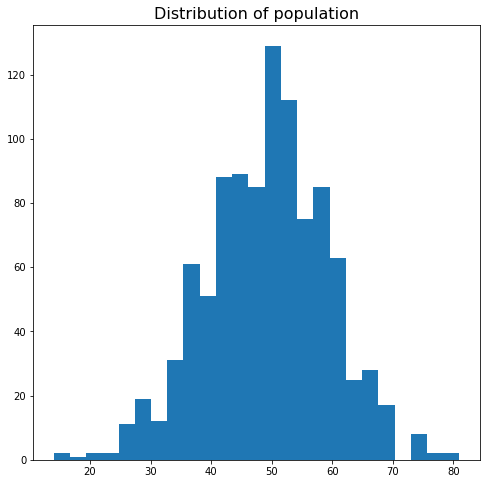

In [16]:
# Define population mean, standard standard deviation and population size
mean = 50
sd = 10
pop_size = 1000

# Create an array of normal distributed value to represent population and convert to integers. Code adapted from
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.normal.html
# and https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html
pop = np.random.normal(mean,sd,pop_size).astype(int)

# Display array. Code adapted from https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html
figure = plt.hist(pop, bins=25)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.title("Distribution of population", fontsize = 16)
plt.show()

In [17]:
# Define function to calculate the standard deviation of population using the 'N' method
# Code adapted from https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://numpy.org/doc/stable/reference/generated/numpy.square.html and
# https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html and
# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-16.php
def sdp(pop):
    """Function to calculate the standard deviation
        of a population using the 'N' method
        """
    return np.sqrt(np.sum(np.square(pop - np.mean(pop)))/pop.size)

# Calculate the standard deviation of the whole population using the 'N' method
sd_p = sdp(pop)

# Display whole population SD result
print(f"""For {pop.size} population size set with SD of {sd}, 'N' method SD is {sd_p:6.3f}.""")

For 1000 population size set with SD of 10, 'N' method SD is  9.918.


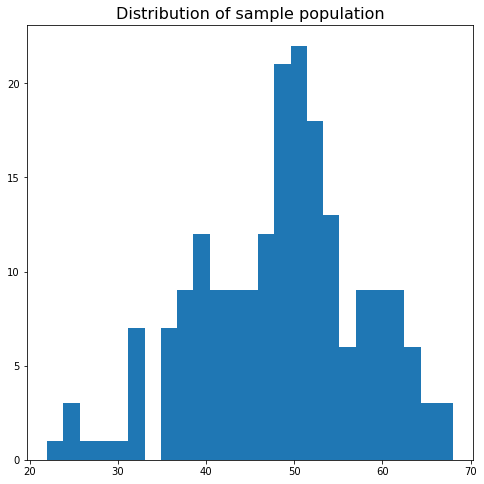

In [18]:
# Take a 20% sample from the population
sam_prop = 0.2
# Code adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html#numpy.random.choice
sam_pop = np.random.choice(pop, size=int(sam_prop*pop.size), replace=False)

# Display array. Code adapted from https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html
figure = plt.hist(sam_pop, bins=25)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.title("Distribution of sample population", fontsize = 16)
plt.show()

In [19]:
# Calculate the standard deviation of sample population using the 'N' method
sam_sd_p = sdp(sam_pop)

# Display sample population SD result base
print(f"""For {int((sam_pop.size/pop.size)*100)}% sample size of population {pop.size},  'N' method SD is {sam_sd_p:6.3f}.""")

# Define function to calculate the sample standard deviation of population using the 'n-1' method
def sds(pop):
    """Function to calculate the sample standard deviation
        of a population using the 'n-1' method
        """
    return np.sqrt(np.sum(np.square(pop - np.mean(pop)))/(pop.size-1))

# Calculate the standard deviation of sample population using the 'n-1' method
sd_s = sds(sam_pop)

# Display sample population SD result base
print(f"""For {int((sam_pop.size/pop.size)*100)}% sample size of population {pop.size}, 'n-1' method SD is {sd_s:6.3f}.\n""")    

For 20% sample size of population 1000,  'N' method SD is  9.298.
For 20% sample size of population 1000, 'n-1' method SD is  9.321.



In [20]:
# test standard deviation function with numpy calculation Code adpated from [3.12] 
print(f"SD of population {np.std(pop):6.3f}")
print(f"SD of sample {np.std(sam_pop):6.3f}")
print(f"Sample SD {np.std(sam_pop,ddof=1):6.3f}")

SD of population  9.918
SD of sample  9.298
Sample SD  9.321


In [21]:
# Test of difference sample sizes and proportion

# Redefine population mean, standard standard deviation and % of pop for sample size
mean = 50
sd = 10
sam_prop = 0.5

# Create array for storing population number
pop_arr = [] 
# Number of step to increase population
for n in range(100, 1100, 100):
  pop_arr.append(n)

# Create array for storing population proportions
sam_prop_arr = []
# Number of % steps to increase proportion of sample
for n in range(10, 60, 10):
  sam_prop_arr.append(n/100)

# Create df for storing test results. Code adapted from https://stackoverflow.com/a/43574027
col = ['Pop Size', 'Sam %', 'SDsam', 'SDsam-PopSD', 'SamSD', 'SamSD-PopSD']
test_df = pd.DataFrame(columns = col)

# Print headings
#print("Population     : SD of sample     : Sample SD")
#print("Size   : Sam % : (Diff to POP SD) : (Diff to POP SD)")
# For each population
for p in pop_arr:
    # For each proportion of population
    for sam_prop in sam_prop_arr:
        # Generate a population of that size
        pop = np.random.normal(mean,sd,p).astype(int)
        # Take a % sample of the population
        sam_pop = np.random.choice(pop, size=int(sam_prop*pop.size), replace=False)
        # Calculate the standard deviation of the whole population using the 'N' method
        sd_p = sdp(pop)
        # Calculate the standard deviation of the sample population using the 'N' method
        sam_sd_p = sdp(sam_pop)
        # Calculate the standard deviation of sample population using the 'n-1' method
        sd_s = sds(sam_pop)
        # Display whole population SD result, SD for sample result & sample SD result
        #print(f"{pop.size:5d}  : {int(sam_prop*100)}%   : {sam_sd_p:6.3f}({sd_p-sam_sd_p:6.3f})   : {sd_s:6.3f}({sd_p-sd_s:6.3f})") 
        # Create row for adding to test_df
        row_df = pd.DataFrame(data=[[pop.size, int(sam_prop*100), round(sam_sd_p,3),
                               round(sd_p-sam_sd_p,3), round(sd_s,3), round(sd_p-sd_s,3)]], columns = col)
        # Add row to test_df. Code adapted from
        # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
        test_df = test_df.append(row_df, ignore_index=True)
    #print("")
    
test_df  

,Pop Size,Sam %,SDsam,SDsam-PopSD,SamSD,SamSD-PopSD
0,100,10,9.706,0.362,10.231,-0.163
1,100,20,7.516,2.695,7.711,2.500
2,100,30,9.260,0.675,9.418,0.517
3,100,40,9.373,1.106,9.493,0.987
4,100,50,10.935,-0.958,11.046,-1.069
5,200,10,10.077,-0.278,10.339,-0.540
6,200,20,9.041,0.954,9.156,0.839
7,200,30,10.920,-0.965,11.012,-1.057
8,200,40,9.255,1.129,9.313,1.071
9,200,50,10.076,0.097,10.127,0.047


In [22]:
# Calculate average difference for 'N' and 'n-1' Code adapted from https://stackoverflow.com/a/31037360
print(f"""Mean test differences from Population Standard Deviation;
Standard Deviation of sample ('N' method) : {round(test_df["SDsam-PopSD"].mean(),3)}
Sample Standard Deviation ('n-1' method)  : {round(test_df["SamSD-PopSD"].mean(),3)}""")


Mean test differences from Population Standard Deviation;
Standard Deviation of sample ('N' method) : 0.251
Sample Standard Deviation ('n-1' method)  : 0.186


### Conclusions
On average the Bessel's correction 'n-1' method for the sample standard deviation used for the MS Excel STDEV.S function does appear to produce a less bias standard deviation, but it not without bias and on occasion can provide a less accurate estimate of standard deviation. As both the population size and sample proportion of the population increase, the accuracy of standard deviation calculation based on the sample improve and the close together both the STDEV.S and STDEV.P function method results become.

***

### References

[3.1] Standard Deviation & Standard deviation of average height for adult men; Wikipedia; https://en.wikipedia.org/wiki/Standard_deviation

[3.2] Standard Deviation; mathsisfun.com; https://www.mathsisfun.com/data/standard-deviation.html

[3.3] Normal Distribution; mathsisfun.com; https://www.mathsisfun.com/data/standard-normal-distribution.html

[3.4] 68–95–99.7 empirical rule; Wikipedia; https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

[3.5] Sample Standard Deviation; Lund Research Ltd; https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

[3.6] Population and sample standard deviation review; khanacademy.org; https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review#:~:text=Here's%20how%20to%20calculate%20sample,mean%20from%20each%20data%20point.&text=Step%205%3A%20Divide%20the%20sum%20by%20one%20less%20than%20the,data%20points%20in%20the%20sample.

[3.7] MS Excel STDEVP function; Microsoft support; https://support.microsoft.com/en-us/office/stdevp-function-1f7c1c88-1bec-4422-8242-e9f7dc8bb195

[3.8] The Excel STDEV.P Function; ExcelFunctions.net; https://www.excelfunctions.net/excel-stdev-p-function.html

[3.9] MS Excel STDEVS function; Microsoft support; https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[3.10] The Excel STDEV.S Function; ExcelFunctions.net; https://www.excelfunctions.net/excel-stdev-s-function.html

[3.11] Bessel's correction; Wikipedia; https://en.wikipedia.org/wiki/Bessel%27s_correction

[3.12] The Reasoning Behind Bessel’s Correction: n-1 ; Brayton Hall - towards data scinece; https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9

***

## Task 4: To be advised

**Task Description:** To be advised

***